# iPhone purchase prediction by using KNN Classification
By- Rhushikesh Ugemuge 

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from scipy.stats import mode


In [75]:
data=pd.read_csv('iphone.csv')
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [77]:
data.shape

(400, 4)

In [78]:
data.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<AxesSubplot:xlabel='Salary', ylabel='Age'>

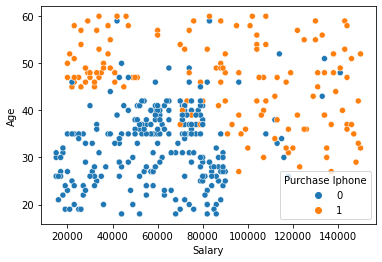

In [79]:
sns.scatterplot(x=data['Salary'],y=data['Age'], hue=data['Purchase Iphone'])

In [80]:
data = data.drop('Gender',axis=1)
data.head()

,Age,Salary,Purchase Iphone
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


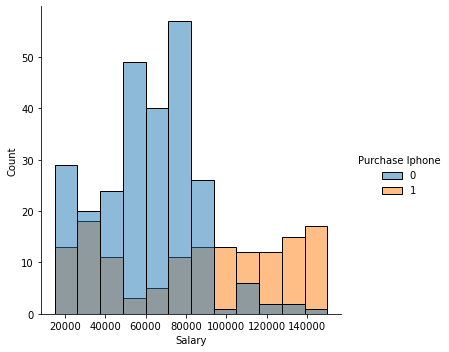

In [81]:
sns.displot(data, x = 'Salary', hue = 'Purchase Iphone')

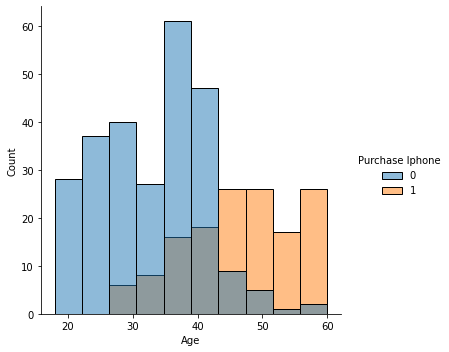

In [82]:
sns.displot(data, x = 'Age', hue = 'Purchase Iphone')

In [83]:
import numpy as np

def euclidean_distance(pt1, pt2):
    distance = np.sqrt(np.sum((pt1 - pt2) ** 2))
    return distance

a = np.array([3,4])
b = np.array([5,9])

print( euclidean_distance(a,b))

5.385164807134504


In [84]:
x = data.drop('Purchase Iphone', axis=1)
y = data['Purchase Iphone']

In [85]:
print(x)

     Age  Salary
0     19   19000
1     35   20000
2     26   43000
3     27   57000
4     19   76000
..   ...     ...
395   46   41000
396   51   23000
397   50   20000
398   36   33000
399   49   36000

[400 rows x 2 columns]


In [86]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64


In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,random_state=0)

In [88]:
print(x_train.shape)

(260, 2)


In [89]:
print(y_train.shape)

(260,)


In [90]:
print(x_test.shape)

(140, 2)


In [91]:
print(y_test.shape)

(140,)


In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
unknown_value = KNeighborsClassifier(n_neighbors=7)

In [94]:
unknown_value.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [95]:
y_pred = unknown_value.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [96]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.8357142857142857


# Feature Scaling

In [97]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

Text(0, 0.5, 'Mean Error')

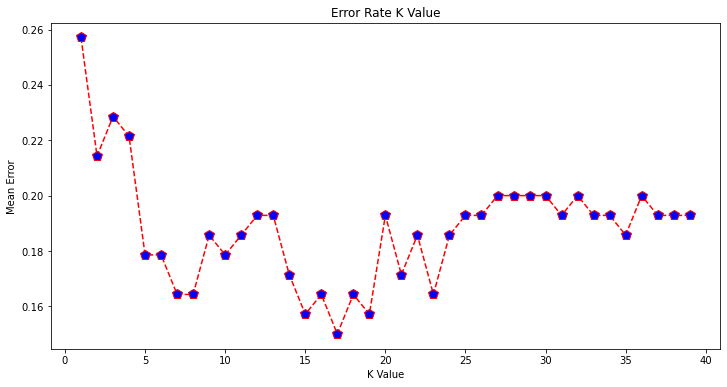

In [98]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    pred_i = model.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40),error, color='red', linestyle='dashed', marker='p',markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
    



In [99]:
data.head()

,Age,Salary,Purchase Iphone
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [102]:
Age = int(input("Enter New Person Age:"))
Salary = int(input("Enter New Person Salary:"))
newperson = [[Age,Salary]]
result = model.predict(sc.transform(newperson))
print(result)

if result == 1:
    print("person might purchase Iphone")
else:
     print("person might not purchase IPhone")

Enter New Person Age:55
Enter New Person Salary:700000
[0]
person might not purchase IPhone


In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[81  8]
 [15 36]]
Accuracy of the Model: 83.57142857142857%
